In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr        

from IPython.display import display
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator

In [3]:
from plotnine import ggplot, geom_boxplot, aes, stat_smooth, facet_wrap, theme_matplotlib, ylim
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['svg.fonttype'] = 'none'
rcParams['axes.grid'] = True
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.grid.which'] = 'both'
rcParams['grid.color'] = "black"
rcParams['grid.linestyle'] = 'dashed'
rcParams['lines.linewidth'] = 1
rcParams['axes.linewidth'] = 0.5
rcParams['grid.linewidth'] = 0.25
rcParams['grid.alpha'] = 0.5
rcParams['figure.subplot.wspace'] = 0.4
rcParams['figure.subplot.hspace'] = 0.5
rcParams['axes.labelpad'] = 0.5

rcParams['axes.labelsize'] = 11
rcParams['axes.labelweight'] = "normal"
rcParams['axes.titlesize'] = 12
rcParams['axes.titleweight'] = "bold"
rcParams['figure.titlesize'] = 14
rcParams['figure.titleweight'] = "bold"
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 11
rcParams['legend.title_fontsize'] = 12
rcParams['legend.title_fontsize'] = 12

In [4]:
group_description = {"at_hook": "AT-hook",
                    "at_rich_interacting": "AT-rich interacting",
                    "nurd": "NuRD",
                    "sall": "Sall Proteins"}

# Figure 1A

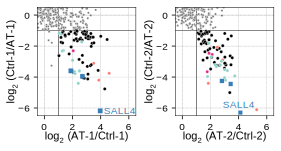

In [5]:
two = pd.read_csv("data/Fig1//perseustable_2014.txt", sep="\t", comment="#")
groups = ["#fb8072", "#e7298a", "#8dd3c7", "#377eb8"]

fig, (bx, ax) = plt.subplots(1, 2, figsize=(4.25,2))
two.plot(kind="scatter", x="Ratio H/L normalized pd4_forward", edgecolor="white",
                  y="Ratio H/L normalized pd4_reverse", linewidth=0.25,                 
                  color="grey", ax=ax, s=5, zorder=-3)
for z, ii, (i, j) in zip(groups, ["o", "o", "o", "s"], two.groupby("Color")):    
    if ii == "s":
        j.plot(kind="scatter", x="Ratio H/L normalized pd4_forward", linewidth=0.25,
            y="Ratio H/L normalized pd4_reverse", marker=ii, zorder=100,              
            color=z, label=group_description[i], s=20, edgecolor="white", ax=ax)
    else:
        j.plot(kind="scatter", x="Ratio H/L normalized pd4_forward", linewidth=0.25,
            y="Ratio H/L normalized pd4_reverse", marker=ii, zorder=100,              
            color=z, label=group_description[i], s=10, edgecolor="white", ax=ax)
two[(two["Color"].isnull()) & ((two["Ratio H/L normalized pd4_forward"] > 1) &
    (two["Ratio H/L normalized pd4_reverse"] < -1))].plot(kind="scatter",
                  x="Ratio H/L normalized pd4_forward", linewidth=0.25,
                  y="Ratio H/L normalized pd4_reverse",                  
                  color="black", s=10, zorder=-2, edgecolor="white",
                  ax=ax)

_ = ax.set_xlim(-.5, 6.5)
_ = ax.set_ylim(-6.5, .5)
_ = ax.axhline(y=0, linestyle="dashed", color="darkgrey", linewidth=0.25, zorder=-5)
_ = ax.axhline(y=-1, linestyle="solid", color="black", linewidth=0.5, zorder=-5)
_ = ax.axvline(x=0, linestyle="dotted", color="darkgrey", linewidth=0.25, zorder=-5)
_ = ax.axvline(x=1, linestyle="solid", color="black", linewidth=0.5, zorder=-5)
_ = ax.legend(loc="center right", bbox_to_anchor=(1.55, 0.5)).set_visible(False)
_ = ax.set_xticks([0, 2, 4, 6])
_ = ax.set_yticks([0, -2, -4, -6])

x = two[(two["Gene names"] == "Sall4") & (two["Color"] == "sall")].values[0][0]
y = two[(two["Gene names"] == "Sall4") & (two["Color"] == "sall")].values[0][1]
_ = ax.text(x-1.1, y+0.2, "SALL4", color="#377eb8", fontsize="10")

_ = ax.set_xlabel(r"$\mathregular{log_2}$ (AT-2/Ctrl-2)")
_ = ax.set_ylabel(r"$\mathregular{log_2}$ (Ctrl-2/AT-2)")

two.plot(kind="scatter", x="Ratio H/L normalized pd2_forward", linewidth=0.25,
                  y="Ratio H/L normalized pd2_reverse", edgecolor="white",                 
                  color="grey", ax=bx, s=5, zorder=-3)
for z, ii, (i, j) in zip(groups, ["o", "o", "o", "s"], two.groupby("Color")):       
    if ii == "s":
        j.plot(kind="scatter", x="Ratio H/L normalized pd2_forward", linewidth=0.25,
            y="Ratio H/L normalized pd2_reverse", marker=ii, zorder=100,              
            color=z, label=group_description[i], s=20, edgecolor=z, ax=bx)   
    else:
        j[(j["Ratio H/L normalized pd2_forward"] > 1) & (j["Ratio H/L normalized pd2_reverse"] < -1)].plot(
            kind="scatter", x="Ratio H/L normalized pd2_forward", linewidth=0.25,
            y="Ratio H/L normalized pd2_reverse", marker=ii, zorder=100,              
            color=z, label=group_description[i], s=10, edgecolor="white", ax=bx)   
two[(two["Color"].isnull()) & ((two["Ratio H/L normalized pd2_forward"] > 1) &
    (two["Ratio H/L normalized pd2_reverse"] < -1))].plot(kind="scatter",
                  x="Ratio H/L normalized pd2_forward", linewidth=0.25,
                  y="Ratio H/L normalized pd2_reverse",                  
                  color="black",  s=10, zorder=-2, edgecolor="white",
                  ax=bx)

_ = bx.set_xlim(-.5, 6.5)
_ = bx.set_ylim(-6.5, .5)
_ = bx.axhline(y=0, linestyle="dashed", color="darkgrey", linewidth=0.25, zorder=-5)
_ = bx.axhline(y=-1, linestyle="solid", color="black", linewidth=0.5, zorder=-5)
_ = bx.axvline(x=0, linestyle="dotted", color="darkgrey", linewidth=0.25, zorder=-5)
_ = bx.axvline(x=1, linestyle="solid", color="black", linewidth=0.5, zorder=-5)
_ = bx.legend(loc="center right", bbox_to_anchor=(1.55, 0.5)).set_visible(False)
_ = bx.set_xticks([0, 2, 4, 6])
_ = bx.set_yticks([0, -2, -4, -6])

x = two[(two["Gene names"] == "Sall4") & (two["Color"] == "sall")].values[0][0]
y = two[(two["Gene names"] == "Sall4") & (two["Color"] == "sall")].values[0][1]
_ = bx.text(x+.25, y-.2, "SALL4", color="#377eb8", fontsize="10")

_ = bx.set_xlabel(r"$\mathregular{log_2}$ (AT-1/Ctrl-1)")
_ = bx.set_ylabel(r"$\mathregular{log_2}$ (Ctrl-1/AT-1)")

In [6]:
from sinfo import sinfo
sinfo()

-----
matplotlib  3.3.2
numpy       1.19.2
pandas      1.1.3
plotnine    0.6.0
scipy       1.5.2
seaborn     0.11.0
sinfo       0.3.1
sklearn     0.23.2
statsmodels 0.12.0
-----
IPython             7.18.1
jupyter_client      6.1.7
jupyter_core        4.6.3
jupyterlab          2.2.8
notebook            6.1.4
-----
Python 3.8.6 (default, Sep 30 2020, 04:00:38) [GCC 10.2.0]
Linux-5.4.71-1-lts-x86_64-with-glibc2.2.5
4 logical CPU cores
-----
Session information updated at 2020-10-18 21:48
